In [1]:
import pandas as pd
import numpy as np

In [2]:
class Config:
    train_path = "../input/train_v2.csv"
    test_path = "../input/test_v2.csv"
    sample_submission_path = "../input/sample_submission.csv"
    output_path = "../submission/"
    seed = 42
    n_splits = 2


In [3]:
df_train = pd.read_csv(Config.train_path)
df_test = pd.read_csv(Config.test_path)

In [4]:
df_train.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,winddirection_utsunomiya,winddirection_chiba,winddirection_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,pollen_utsunomiya,pollen_chiba,pollen_tokyo
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,16,1,2,2.7,2.5,1.3,0.0,8.0,0.0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,1,1,1,3.3,1.5,0.9,0.0,24.0,4.0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,1,15,16,4.0,1.7,0.6,4.0,32.0,12.0
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,1,15,1,4.1,3.1,1.4,0.0,12.0,0.0
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,2,14,14,3.7,3.4,0.9,0.0,32.0,4.0


In [5]:
df_train = df_train.replace('欠測', 0)

In [6]:
df_train["precipitation_tokyo"] = df_train["precipitation_tokyo"].astype(float)
df_train["temperature_chiba"] = df_train["temperature_chiba"].astype(float)
df_train["temperature_tokyo"] = df_train["temperature_tokyo"].astype(float)
df_train["winddirection_chiba"] = df_train["winddirection_chiba"].astype(int)
df_train["winddirection_tokyo"] = df_train["winddirection_tokyo"].astype(int)
df_train["windspeed_chiba"] = df_train["windspeed_chiba"].astype(float)
df_train["windspeed_tokyo"] = df_train["windspeed_tokyo"].astype(float)


In [7]:
df_train.dtypes

datetime                      int64
precipitation_utsunomiya    float64
precipitation_chiba         float64
precipitation_tokyo         float64
temperature_utsunomiya      float64
temperature_chiba           float64
temperature_tokyo           float64
winddirection_utsunomiya      int64
winddirection_chiba           int64
winddirection_tokyo           int64
windspeed_utsunomiya        float64
windspeed_chiba             float64
windspeed_tokyo             float64
pollen_utsunomiya           float64
pollen_chiba                float64
pollen_tokyo                float64
dtype: object

In [8]:
df_test = df_test.replace("欠測", np.nan)

In [9]:
df_test.isna().any()

datetime                    False
precipitation_utsunomiya    False
precipitation_chiba         False
precipitation_tokyo         False
temperature_utsunomiya      False
temperature_chiba           False
temperature_tokyo           False
winddirection_utsunomiya    False
winddirection_chiba         False
winddirection_tokyo         False
windspeed_utsunomiya        False
windspeed_chiba             False
windspeed_tokyo             False
pollen_utsunomiya           False
pollen_chiba                False
pollen_tokyo                False
dtype: bool

In [10]:
def add_wind_direction_one_hot(df: pd.DataFrame) -> pd.DataFrame:

    cols = [
        "winddirection_utsunomiya",
        "winddirection_tokyo",
        "winddirection_chiba",
    ]

    num_wind_direction = 17

    dfs = []
    for col in cols:
        data = {f"{col}_{i}": [] for i in range(num_wind_direction)}
        for x in df[col].astype(int):
            for i in range(num_wind_direction):
                if x == i:
                    data[f"{col}_{i}"].append(1)
                else:
                    data[f"{col}_{i}"].append(0)

        _df = pd.DataFrame(data)
        dfs.append(_df)

    return pd.concat([df] + dfs, axis=1)


def make_feat(df):
    _df = add_wind_direction_one_hot(df)
    _df = _df.drop([
        "winddirection_utsunomiya",
        "winddirection_tokyo",
        "winddirection_chiba",
    ], axis=1)


    


    return _df


In [11]:
_df = add_wind_direction_one_hot(df_train)
_df = _df.drop([
        "winddirection_utsunomiya",
        "winddirection_tokyo",
        "winddirection_chiba",
    ], axis=1)

In [12]:
_df_test = add_wind_direction_one_hot(df_test)
_df_test = _df_test.drop([
        "winddirection_utsunomiya",
        "winddirection_tokyo",
        "winddirection_chiba",
    ], axis=1)

In [13]:
_df.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,...,winddirection_chiba_7,winddirection_chiba_8,winddirection_chiba_9,winddirection_chiba_10,winddirection_chiba_11,winddirection_chiba_12,winddirection_chiba_13,winddirection_chiba_14,winddirection_chiba_15,winddirection_chiba_16
0,2017020101,0.0,0.0,0.0,-1.0,4.1,2.9,2.7,2.5,1.3,...,0,0,0,0,0,0,0,0,0,0
1,2017020102,0.0,0.0,0.0,-1.1,4.2,2.6,3.3,1.5,0.9,...,0,0,0,0,0,0,0,0,0,0
2,2017020103,0.0,0.0,0.0,-0.7,4.2,2.4,4.0,1.7,0.6,...,0,0,0,0,0,0,0,0,1,0
3,2017020104,0.0,0.0,0.0,-1.1,4.4,1.8,4.1,3.1,1.4,...,0,0,0,0,0,0,0,0,1,0
4,2017020105,0.0,0.0,0.0,-1.2,4.1,1.5,3.7,3.4,0.9,...,0,0,0,0,0,0,0,1,0,0


In [14]:
_df_test.head()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,...,winddirection_chiba_7,winddirection_chiba_8,winddirection_chiba_9,winddirection_chiba_10,winddirection_chiba_11,winddirection_chiba_12,winddirection_chiba_13,winddirection_chiba_14,winddirection_chiba_15,winddirection_chiba_16
0,2020040101,0.0,0.0,0.0,9.5,10.5,9.0,2.1,2.3,1.2,...,0,0,0,0,0,0,0,0,0,0
1,2020040102,0.0,0.0,0.0,9.2,10.3,9.0,1.4,2.7,0.8,...,0,0,0,0,0,0,0,0,0,1
2,2020040103,0.0,0.0,0.0,9.2,10.2,9.1,3.3,2.5,0.5,...,0,0,0,0,0,0,0,0,0,1
3,2020040104,0.0,0.0,0.0,9.4,10.3,9.2,1.3,2.9,1.2,...,0,0,0,0,0,0,0,0,1,0
4,2020040105,0.0,0.0,0.0,9.3,10.2,9.3,2.3,2.6,0.7,...,0,0,0,0,0,0,0,0,0,1


In [15]:
# 時間
import datetime
import re

def to_datetime(time: datetime.datetime) -> datetime.datetime:
    time = str(time)
    try:
        time = datetime.datetime.strptime(time, "%Y%m%d%H")
    except ValueError:
        time = re.sub("24$", "23", time)
        time = datetime.datetime.strptime(time, "%Y%m%d%H")
        time += datetime.timedelta(hours=1)
    return time



def add_time_info(_df):

    #_df["datetime_dt"] = _df["datetime"].apply(to_datetime)
    #_df["day"] = _df["datetime_dt"].dt.day
    _df["day"] = (_df["datetime"] % 10000) // 100
    _df["ym"] = _df["datetime"].astype(str).apply(lambda x: x[:6])
    
    # two week
    #_df["ymd"] = _df["ym"] + _df["day"].apply(lambda x: "-1-2-week" if int(x) < 15 else "-2-3-week")
    
    # one week
    _df["ymd"] = _df["ym"] + _df["day"].apply(lambda x:  f"week_{(x - 1) // 7}")

    return _df

In [16]:
_df = add_time_info(_df)
_df_test = add_time_info(_df_test)

In [17]:
_df.shape, _df_test.shape

((12240, 67), (336, 67))

In [18]:
_df.loc[_df["pollen_utsunomiya"] < 0, "pollen_utsunomiya"] = 0
_df.loc[_df["pollen_chiba"] < 0, "pollen_chiba"] = 0
_df.loc[_df["pollen_tokyo"] < 0 , "pollen_tokyo"] = 0

In [19]:
_df.loc[ _df["day"] > 15 ,  ["datetime", "day", "ymd"]]

,datetime,day,ymd
360,2017021601,16,201702week_2
361,2017021602,16,201702week_2
362,2017021603,16,201702week_2
363,2017021604,16,201702week_2
364,2017021605,16,201702week_2
...,...,...,...
12235,2020033120,31,202003week_4
12236,2020033121,31,202003week_4
12237,2020033122,31,202003week_4
12238,2020033123,31,202003week_4


In [20]:
_df.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,...,winddirection_chiba_10,winddirection_chiba_11,winddirection_chiba_12,winddirection_chiba_13,winddirection_chiba_14,winddirection_chiba_15,winddirection_chiba_16,day,ym,ymd
12235,2020033120,0.0,0.0,0.0,10.0,11.5,9.4,2.4,2.6,0.7,...,0,0,0,0,0,0,0,31,202003,202003week_4
12236,2020033121,0.0,0.0,0.0,10.1,11.3,8.9,2.4,1.7,1.3,...,0,0,0,0,0,1,0,31,202003,202003week_4
12237,2020033122,0.0,0.0,0.0,9.8,11.3,8.8,1.2,2.7,0.9,...,0,0,0,0,0,1,0,31,202003,202003week_4
12238,2020033123,0.5,0.0,0.0,9.7,10.9,8.9,0.5,2.9,0.6,...,0,0,0,0,0,0,1,31,202003,202003week_4
12239,2020033124,0.0,0.0,0.0,9.7,10.7,8.9,1.0,2.7,0.4,...,0,0,0,0,0,0,0,31,202003,202003week_4


In [21]:
_df_test[_df_test["ymd"] == "202004week_1"]

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,...,winddirection_chiba_10,winddirection_chiba_11,winddirection_chiba_12,winddirection_chiba_13,winddirection_chiba_14,winddirection_chiba_15,winddirection_chiba_16,day,ym,ymd
168,2020040801,0.0,0.0,0.0,7.6,11.4,9.1,2.6,2.1,1.2,...,0,0,0,0,0,0,0,8,202004,202004week_1
169,2020040802,0.0,0.0,0.0,7.3,9.8,8.7,2.5,2.5,0.8,...,0,0,0,0,0,0,0,8,202004,202004week_1
170,2020040803,0.0,0.0,0.0,6.7,9.3,7.5,2.0,2.2,0.5,...,0,0,0,0,0,0,0,8,202004,202004week_1
171,2020040804,0.0,0.0,0.0,5.4,8.8,7.0,1.5,2.2,0.4,...,0,0,0,0,0,0,0,8,202004,202004week_1
172,2020040805,0.0,0.0,0.0,5.0,8.7,6.3,2.7,2.5,0.3,...,0,0,0,0,0,0,0,8,202004,202004week_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2020041420,0.0,0.0,0.0,9.9,12.5,10.2,2.8,1.9,1.9,...,0,0,0,0,0,0,1,14,202004,202004week_1
332,2020041421,0.0,0.0,0.0,8.3,11.7,10.1,2.2,3.6,1.7,...,0,0,0,0,0,1,0,14,202004,202004week_1
333,2020041422,0.0,0.0,0.0,7.2,11.5,8.8,2.9,0.9,1.0,...,0,0,0,0,0,0,1,14,202004,202004week_1
334,2020041423,0.0,0.0,0.0,6.9,10.8,8.4,2.2,3.1,1.2,...,0,0,0,0,1,0,0,14,202004,202004week_1


In [22]:
_df_test.tail()

,datetime,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,...,winddirection_chiba_10,winddirection_chiba_11,winddirection_chiba_12,winddirection_chiba_13,winddirection_chiba_14,winddirection_chiba_15,winddirection_chiba_16,day,ym,ymd
331,2020041420,0.0,0.0,0.0,9.9,12.5,10.2,2.8,1.9,1.9,...,0,0,0,0,0,0,1,14,202004,202004week_1
332,2020041421,0.0,0.0,0.0,8.3,11.7,10.1,2.2,3.6,1.7,...,0,0,0,0,0,1,0,14,202004,202004week_1
333,2020041422,0.0,0.0,0.0,7.2,11.5,8.8,2.9,0.9,1.0,...,0,0,0,0,0,0,1,14,202004,202004week_1
334,2020041423,0.0,0.0,0.0,6.9,10.8,8.4,2.2,3.1,1.2,...,0,0,0,0,1,0,0,14,202004,202004week_1
335,2020041424,0.0,0.0,0.0,5.9,10.2,7.2,2.5,4.1,0.5,...,0,0,0,0,1,0,0,14,202004,202004week_1


In [23]:
cols = [col for col in _df.columns if col not in ["datetime", "datetime_dt", "day", "pollen_utsunomiya", "pollen_chiba", "pollen_tokyo"]]


In [24]:
df_ymd = _df[cols+ ["pollen_utsunomiya", "pollen_chiba", "pollen_tokyo"]].groupby("ymd").sum()
df_ymd_mean = _df[cols].groupby("ymd").mean()
#df_ymd_median = _df[cols].groupby("ymd").median()

df_ymd = pd.concat([df_ymd, df_ymd_mean.add_prefix("mean")], axis=1)


In [25]:
df_ymd.head()

,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,winddirection_utsunomiya_0,...,meanwinddirection_chiba_7,meanwinddirection_chiba_8,meanwinddirection_chiba_9,meanwinddirection_chiba_10,meanwinddirection_chiba_11,meanwinddirection_chiba_12,meanwinddirection_chiba_13,meanwinddirection_chiba_14,meanwinddirection_chiba_15,meanwinddirection_chiba_16
ymd,,,,,,,,,,,,,,,,,,,,,
201702week_0,0.5,0.5,0.0,669.5,1243.9,1008.5,547.1,793.3,278.9,0,...,0.011905,0.005952,0.011905,0.023810,0.041667,0.053571,0.184524,0.386905,0.154762,0.017857
201702week_1,3.5,7.5,6.0,393.4,929.4,696.1,551.5,643.3,238.3,0,...,0.011905,0.000000,0.000000,0.005952,0.023810,0.029762,0.107143,0.392857,0.232143,0.071429
201702week_2,1.0,18.0,7.5,894.7,1455.9,1198.1,578.9,892.6,299.2,0,...,0.011905,0.005952,0.029762,0.154762,0.077381,0.053571,0.017857,0.214286,0.172619,0.047619
201702week_3,2.5,1.0,0.0,923.4,1333.1,1198.3,479.1,681.4,321.0,2,...,0.029762,0.011905,0.053571,0.077381,0.035714,0.035714,0.011905,0.107143,0.130952,0.059524
201703week_0,3.5,27.0,10.5,1073.9,1426.3,1226.9,470.5,432.7,246.7,2,...,0.017857,0.023810,0.005952,0.023810,0.059524,0.071429,0.047619,0.107143,0.089286,0.083333


In [26]:
df_ymd.isna().any().any()

False

In [27]:
_df_ymd_count = _df[["ymd", "pollen_tokyo"]].groupby("ymd").count().reset_index().rename(columns={"pollen_tokyo": "count"})
_df_ymd_count = _df_ymd_count[_df_ymd_count["count"] >= 168].reset_index(drop=True)


In [28]:
df_ymd = df_ymd.reset_index().merge(_df_ymd_count[["ymd"]], on="ymd", how="inner").set_index("ymd")

In [29]:
df_ymd[df_ymd["pollen_utsunomiya"] ==0].shape

(12, 123)

In [30]:
df_ymd.shape

(68, 123)

In [31]:
df_ymd_test = _df_test[cols].groupby("ymd").sum()
df_ymd_test.head()

,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,winddirection_utsunomiya_0,...,winddirection_chiba_7,winddirection_chiba_8,winddirection_chiba_9,winddirection_chiba_10,winddirection_chiba_11,winddirection_chiba_12,winddirection_chiba_13,winddirection_chiba_14,winddirection_chiba_15,winddirection_chiba_16
ymd,,,,,,,,,,,,,,,,,,,,,
202004week_0,20.0,33.0,26.5,1837.4,2222.3,2011.1,576.4,727.8,336.5,0,...,10,4,5,12,22,5,8,21,22,11
202004week_1,36.0,97.5,106.0,1674.7,2005.7,1818.7,794.7,727.1,339.2,0,...,1,2,2,7,3,4,1,23,23,19


In [32]:
df_ymd_test = _df_test[cols + ["pollen_utsunomiya", "pollen_chiba", "pollen_tokyo"]].groupby("ymd").sum()
df_ymd_test_mean = _df_test[cols].groupby("ymd").mean()
#df_ymd_test_median = _df_test[cols].groupby("ymd").median()

df_ymd_test = pd.concat([df_ymd_test, df_ymd_test_mean.add_prefix("mean")], axis=1)


In [33]:
df_ymd_test.shape

(2, 123)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

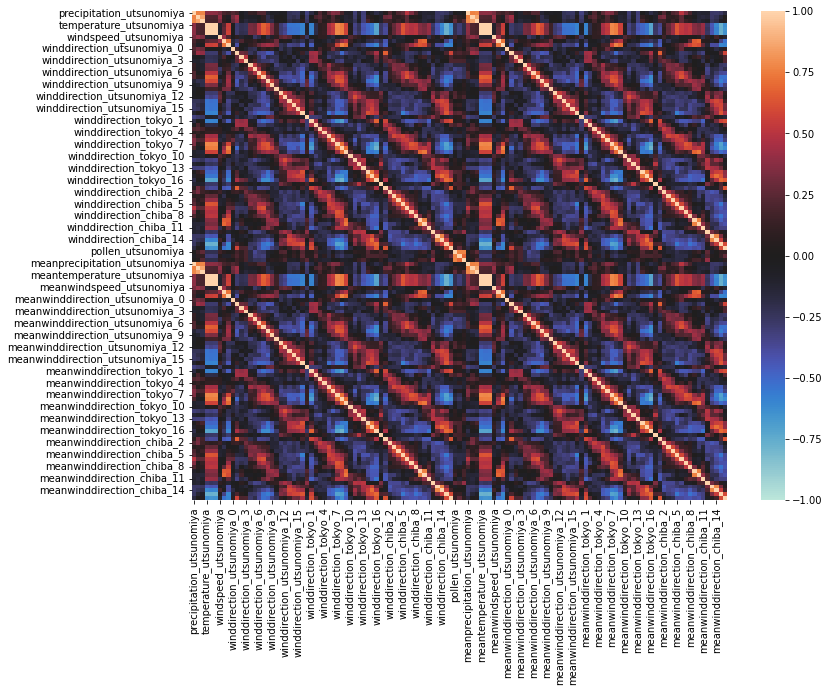

In [35]:
fig, ax = plt.subplots(figsize=(12, 9)) 
sns.heatmap(df_ymd.corr(), vmax=1, vmin=-1, center=0)

In [36]:
df_ymd_test.isna().any().any()

False

In [37]:
df_ymd.shape, df_ymd_test.shape

((68, 123), (2, 123))

In [38]:
set(df_ymd_test.columns) - set(df_ymd.columns)

set()

In [49]:
df_ymd_test.head()

,precipitation_utsunomiya,precipitation_chiba,precipitation_tokyo,temperature_utsunomiya,temperature_chiba,temperature_tokyo,windspeed_utsunomiya,windspeed_chiba,windspeed_tokyo,winddirection_utsunomiya_0,...,meanwinddirection_chiba_7,meanwinddirection_chiba_8,meanwinddirection_chiba_9,meanwinddirection_chiba_10,meanwinddirection_chiba_11,meanwinddirection_chiba_12,meanwinddirection_chiba_13,meanwinddirection_chiba_14,meanwinddirection_chiba_15,meanwinddirection_chiba_16
ymd,,,,,,,,,,,,,,,,,,,,,
202004week_0,20.0,33.0,26.5,1837.4,2222.3,2011.1,576.4,727.8,336.5,0,...,0.059524,0.023810,0.029762,0.071429,0.130952,0.029762,0.047619,0.125000,0.130952,0.065476
202004week_1,36.0,97.5,106.0,1674.7,2005.7,1818.7,794.7,727.1,339.2,0,...,0.005952,0.011905,0.011905,0.041667,0.017857,0.023810,0.005952,0.136905,0.136905,0.113095


<AxesSubplot:xlabel='pollen_tokyo', ylabel='ymd'>

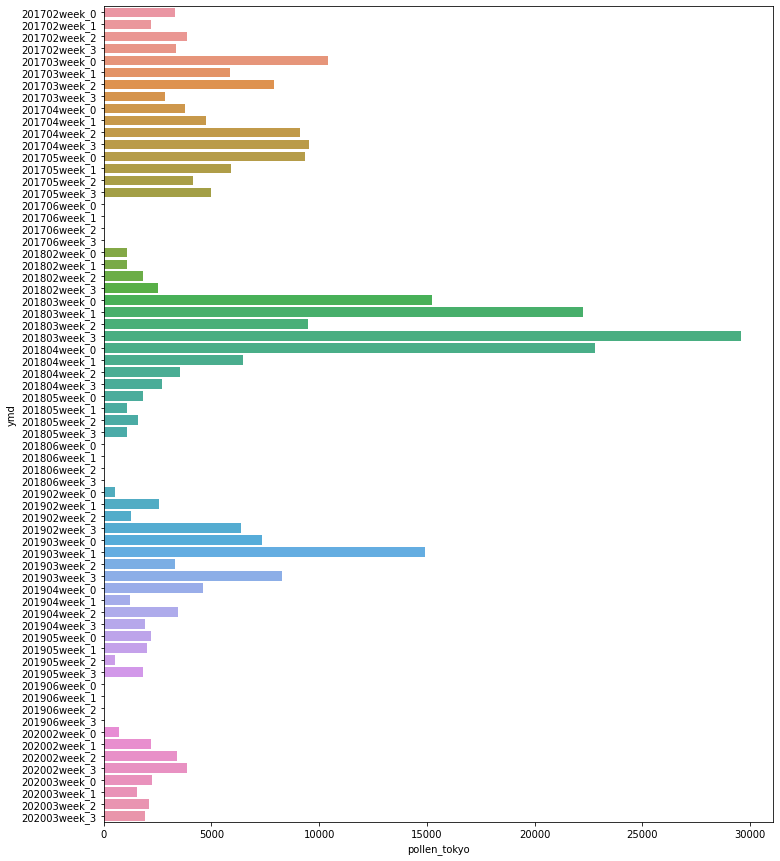

In [40]:
fig, ax = plt.subplots(figsize=(12, 15)) 
sns.barplot(data=df_ymd.reset_index(), y="ymd", x="pollen_tokyo", orient="h")

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Normalizer
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

In [42]:
cols = [col for col in df_ymd.columns if "pollen" not in col]

In [50]:
def pred_pollen_total(df_ymd, df_ymd_test, label, cols):
    #df_ymd = df_ymd[df_ymd[label] < 50000] 

    transformer = Normalizer().fit(df_ymd[cols])
    X = transformer.transform(df_ymd[cols])

    #reg = Ridge(alpha=1.0).fit(X, np.log1p(df_ymd[label]))
    reg = LinearRegression().fit(X, np.log1p(df_ymd[label]))
    #reg = SVR().fit(X, np.log1p(df_ymd[label]))

    print(reg.score(X, np.log1p(df_ymd[label])))

    _df_ymd = df_ymd.copy()
    _df_ymd["pred"] = np.expm1(reg.predict(X))
    print(_df_ymd.head())

    _df_ymd_test = df_ymd_test.copy()
    X_test = transformer.transform(df_ymd_test[cols])
    _df_ymd_test["pred"] = np.expm1(reg.predict(X_test))

    fig, ax = plt.subplots(figsize=(12, 8)) 
    sns.lineplot(data=_df_ymd, x="ymd", y="pred")
    sns.scatterplot(data=_df_ymd, x="ymd", y=label)
    sns.scatterplot(data=_df_ymd_test, x="ymd", y="pred")
    ax.grid()
    plt.xticks(rotation=90)

    return _df_ymd_test

In [51]:
df_ymd["pollen_utsunomiya"]


ymd
201702week_0     5013.0
201702week_1     2481.0
201702week_2     4896.0
201702week_3     9790.0
201703week_0    29643.0
                 ...   
202002week_3     9962.0
202003week_0     5686.0
202003week_1     2830.0
202003week_2     4575.0
202003week_3     6367.0
Name: pollen_utsunomiya, Length: 68, dtype: float64

0.8820185612429667
              precipitation_utsunomiya  precipitation_chiba  \
ymd                                                           
201702week_0                       0.5                  0.5   
201702week_1                       3.5                  7.5   
201702week_2                       1.0                 18.0   
201702week_3                       2.5                  1.0   
201703week_0                       3.5                 27.0   

              precipitation_tokyo  temperature_utsunomiya  temperature_chiba  \
ymd                                                                            
201702week_0                  0.0                   669.5             1243.9   
201702week_1                  6.0                   393.4              929.4   
201702week_2                  7.5                   894.7             1455.9   
201702week_3                  0.0                   923.4             1333.1   
201703week_0                 10.5                  1073.9  

ymd
202004week_0    434.422905
202004week_1     -0.568712
Name: pred, dtype: float64

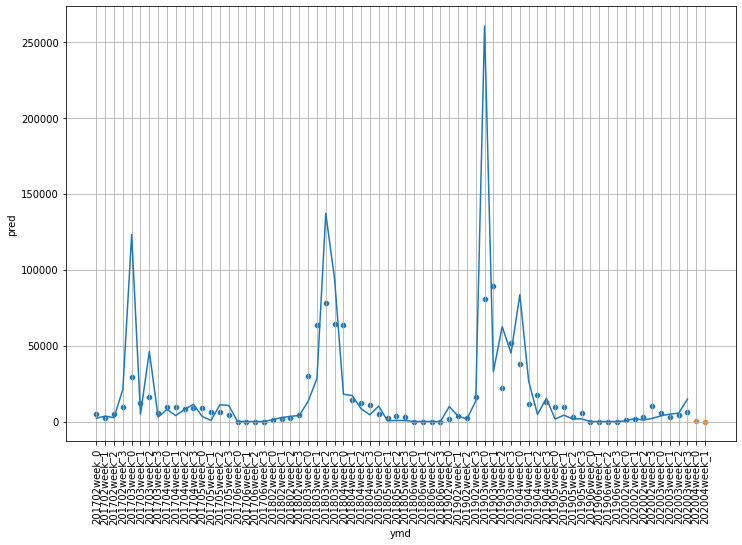

In [52]:
_df_ymd_test = pred_pollen_total(df_ymd, df_ymd_test, "pollen_utsunomiya", cols)
display(_df_ymd_test["pred"])

In [46]:
df_ymd[["pollen_utsunomiya", "pollen_chiba", "pollen_tokyo"]]

,pollen_utsunomiya,pollen_chiba,pollen_tokyo
ymd,,,
201702week_0,5013.0,3924.0,3328.0
201702week_1,2481.0,1960.0,2178.0
201702week_2,4896.0,4194.0,3850.0
201702week_3,9790.0,5791.0,3336.0
201703week_0,29643.0,16713.0,10419.0
...,...,...,...
202002week_3,9962.0,4773.0,3849.0
202003week_0,5686.0,4146.0,2257.0
202003week_1,2830.0,2360.0,1550.0


0.8698009937634583


ymd
202004week_0    115.754492
202004week_1     -0.732169
Name: pred, dtype: float64

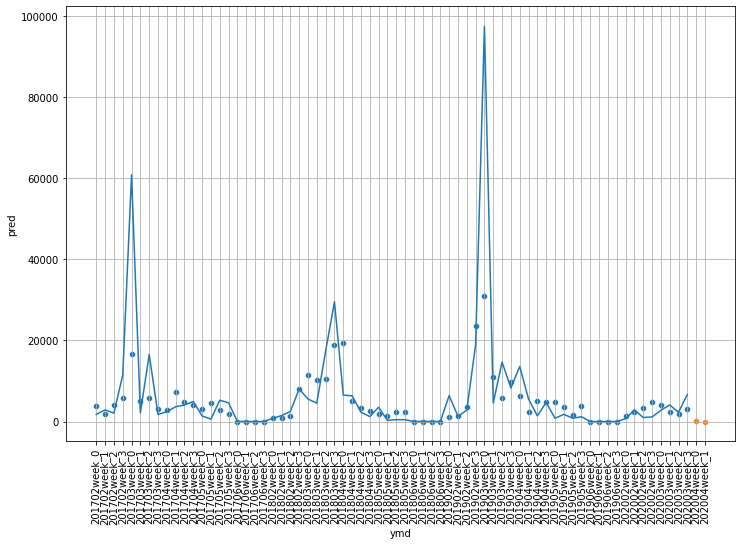

In [47]:
_df_ymd_test = pred_pollen_total(df_ymd, df_ymd_test, "pollen_chiba", cols)
display(_df_ymd_test["pred"])

0.8682171592469832


ymd
202004week_0    20.465855
202004week_1    -0.373396
Name: pred, dtype: float64

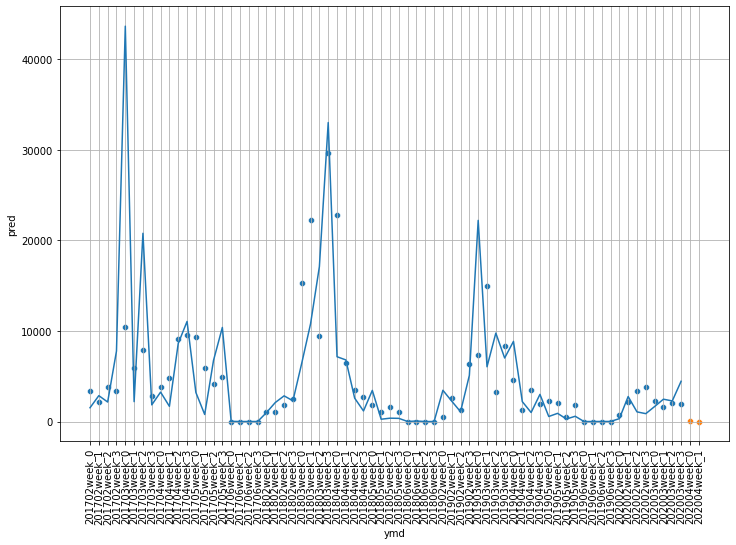

In [48]:
_df_ymd_test = pred_pollen_total(df_ymd, df_ymd_test, "pollen_tokyo", cols)
display(_df_ymd_test["pred"])